1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (30000, 15)
   Aperçu des classes générées : {0: 15206, 1: 14794} (0=Baisse, 1=Hausse)

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 17754

4. Nettoyage des données...
   Imputation terminée.
   Valeurs manquantes restantes : 0

5. Analyse Exploratoire (EDA)...
   Statistiques descriptives (Close_Price, Volume, Sentiment...) :
        Close_Price        Volume  Sentiment_Score
count  30000.000000  3.000000e+04     30000.000000
mean      43.126743  1.004485e+07        -0.003432
std       28.612499  5.592141e+06         0.564920
min        1.000000  1.016990e+05        -1.000000
25%       19.500000  5.330594e+06        -0.487000
50%       40.690000  1.004485e+07        -0.003432
75%       62.190000  1.473037e+07         0.475000
max      130.610000  1.999982e+07         1.000000


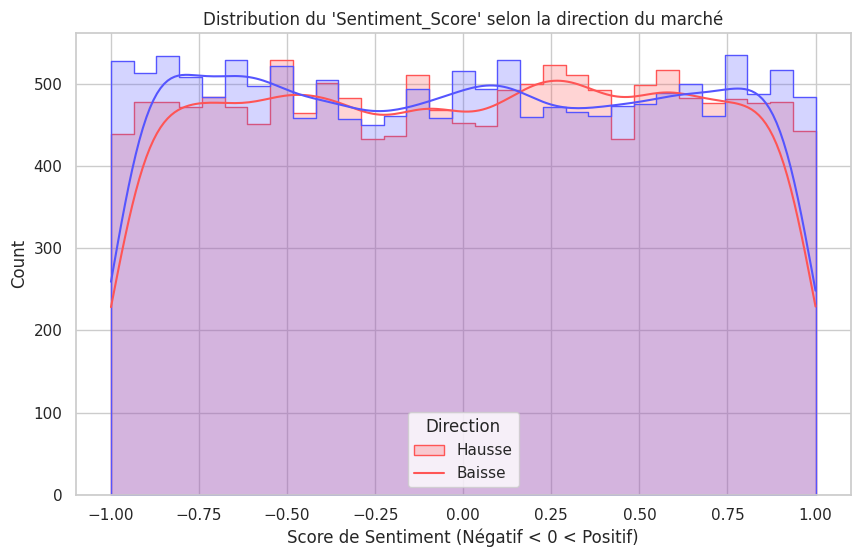

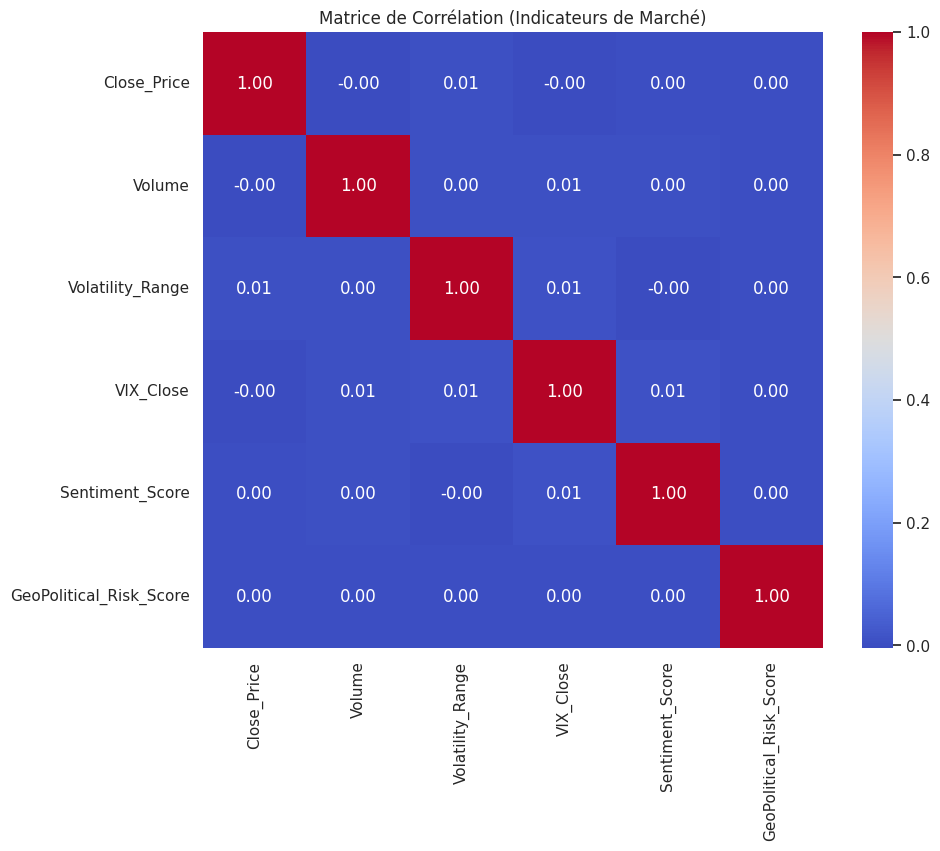

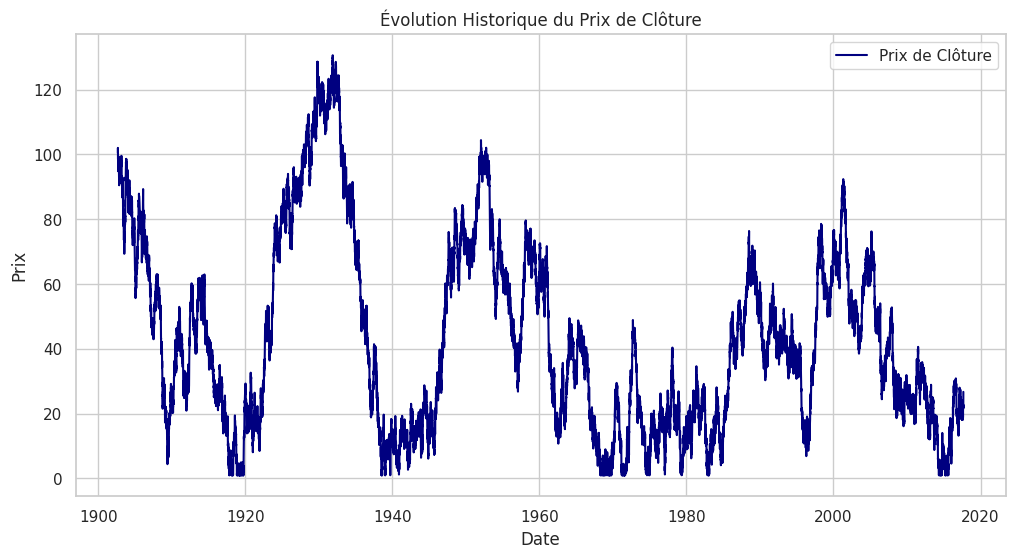


6. Séparation effectuée :
   Entraînement : 24000 échantillons
   Test : 6000 échantillons

7. Entraînement du modèle (Random Forest Classifier)...
   Modèle entraîné avec succès.

8. Évaluation des performances...
   >>> Accuracy Score (Prédiction Hausse/Baisse) : 73.02%

   >>> Rapport de Classification :
               precision    recall  f1-score   support

Baisse/Neutre       0.72      0.77      0.74      3011
       Hausse       0.75      0.69      0.72      2989

     accuracy                           0.73      6000
    macro avg       0.73      0.73      0.73      6000
 weighted avg       0.73      0.73      0.73      6000



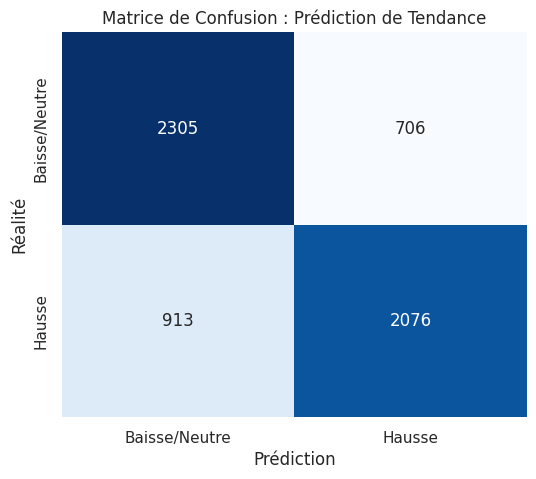


--- FIN DU SCRIPT ---


In [ ]:
# ==============================================================================
# COURS DATA SCIENCE : ADAPTATION MARKET TREND (SCRIPT PÉDAGOGIQUE)
# Dataset : Market_Trend_External.csv
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuration esthétique
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES ET CRÉATION DE LA CIBLE (TARGET)
# ------------------------------------------------------------------------------
# Chargement du fichier CSV
df = pd.read_csv('/content/drive/MyDrive/Market_Trend_External.csv')

# --- ADAPTATION : Création d'une cible de classification ---
# Le script original prédit "Malin/Bénin". Ici, nous allons prédire "Hausse/Baisse".
# Si Daily_Return_Pct > 0, Target = 1 (Hausse), sinon Target = 0 (Baisse).
df['target'] = (df['Daily_Return_Pct'] > 0).astype(int)

# Définition des noms de classes pour l'affichage
target_names = ['Baisse/Neutre', 'Hausse']

print(f"2. Données chargées. Taille du dataset : {df.shape}")
print(f"   Aperçu des classes générées : {df['target'].value_counts().to_dict()} (0=Baisse, 1=Hausse)\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE "DONNÉES SALES" (Pour l'exercice)
# ------------------------------------------------------------------------------
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42)

# On sépare d'abord les features de la target et de la Date (qu'on ne veut pas abîmer)
# On retire aussi 'Daily_Return_Pct' des features car c'est la réponse (fuite de données)
cols_to_exclude = ['Date', 'target', 'Daily_Return_Pct']
features_columns = [c for c in df.columns if c not in cols_to_exclude]

df_dirty = df.copy()

# Introduction de NaN sur 5% des données numériques
for col in features_columns:
    mask = np.random.random(df_dirty.shape[0]) < 0.05
    df_dirty.loc[mask, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty[features_columns].isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE ET PRÉPARATION (Data Wrangling)
# ------------------------------------------------------------------------------
print("4. Nettoyage des données...")

# Séparation X (Features) et y (Target)
# NOTE : On drop 'Date' (car non numérique) et 'Daily_Return_Pct' (car c'est la réponse)
X = df_dirty[features_columns]
y = df_dirty['target']

# Imputation : Remplacer les NaN par la MOYENNE
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Reconstruction du DataFrame propre
X_clean = pd.DataFrame(X_imputed, columns=features_columns)

print("   Imputation terminée.")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE DES DONNÉES (EDA) - GRAPHS ANALYSIS
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...")

# A. Aperçu statistique
print("   Statistiques descriptives (Close_Price, Volume, Sentiment...) :")
print(X_clean[['Close_Price', 'Volume', 'Sentiment_Score']].describe())

# B. Visualisation 1 : Distribution du Sentiment du Marché
plt.figure(figsize=(10, 6))
feature_to_plot = 'Sentiment_Score'
sns.histplot(data=df, x=feature_to_plot, hue='target', kde=True, element="step", palette="seismic")
plt.title(f"Distribution du '{feature_to_plot}' selon la direction du marché")
plt.xlabel("Score de Sentiment (Négatif < 0 < Positif)")
plt.legend(title='Direction', labels=['Hausse', 'Baisse'])
plt.show()

# C. Visualisation 2 : Heatmap de corrélation (Prix, VIX, Sentiment, Risque)
# On sélectionne les colonnes les plus pertinentes pour l'analyse
corr_cols = ['Close_Price', 'Volume', 'Volatility_Range', 'VIX_Close',
             'Sentiment_Score', 'GeoPolitical_Risk_Score']

plt.figure(figsize=(10, 8))
correlation_matrix = X_clean[corr_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Indicateurs de Marché)")
plt.show()

# D. Visualisation Bonus : Evolution du Prix (Time Series)
# Nécessite de reconvertir la date juste pour le graphe
df_viz = df.copy()
df_viz['Date'] = pd.to_datetime(df_viz['Date'])
df_viz = df_viz.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(df_viz['Date'], df_viz['Close_Price'], label='Prix de Clôture', color='navy')
plt.title("Évolution Historique du Prix de Clôture")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# 6. SÉPARATION DES DONNÉES (Train / Test Split)
# ------------------------------------------------------------------------------
# Note : En finance réelle, on ne mélange pas (shuffle=False) pour respecter le temps.
# Pour cet exercice pédagogique, on garde le shuffle standard.
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

print(f"\n6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (Machine Learning)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle (Random Forest Classifier)...")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné avec succès.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION ET PERFORMANCE
# ------------------------------------------------------------------------------
print("8. Évaluation des performances...")

y_pred = model.predict(X_test)

# A. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"   >>> Accuracy Score (Prédiction Hausse/Baisse) : {acc*100:.2f}%")

# B. Rapport détaillé
print("\n   >>> Rapport de Classification :")
print(classification_report(y_test, y_pred, target_names=target_names))

# C. Matrice de Confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion : Prédiction de Tendance')
plt.show()

print("\n--- FIN DU SCRIPT ---")